In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
%cd "/content/drive/MyDrive/TestFlakinessDetector"

/content/drive/MyDrive/TestFlakinessDetector


Epoch 1/50
74/74 [==============================] - 3s 11ms/step - loss: 48.5522 - accuracy: 0.5008 - val_loss: 8.2788 - val_accuracy: 0.4470 - lr: 0.0010
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 26.3662 - accuracy: 0.5017 - val_loss: 5.5020 - val_accuracy: 0.4852 - lr: 0.0010
Epoch 3/50
74/74 [==============================] - 1s 8ms/step - loss: 15.4963 - accuracy: 0.5241 - val_loss: 2.2593 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 4/50
74/74 [==============================] - 0s 5ms/step - loss: 9.0244 - accuracy: 0.5339 - val_loss: 1.7223 - val_accuracy: 0.5403 - lr: 0.0010
Epoch 5/50
74/74 [==============================] - 0s 5ms/step - loss: 5.0517 - accuracy: 0.5686 - val_loss: 0.7498 - val_accuracy: 0.6419 - lr: 0.0010
Epoch 6/50
74/74 [==============================] - 1s 7ms/step - loss: 2.6555 - accuracy: 0.6207 - val_loss: 0.5025 - val_accuracy: 0.8559 - lr: 0.0010
Epoch 7/50
74/74 [==============================] - 0s 7ms/step - loss: 1.1210

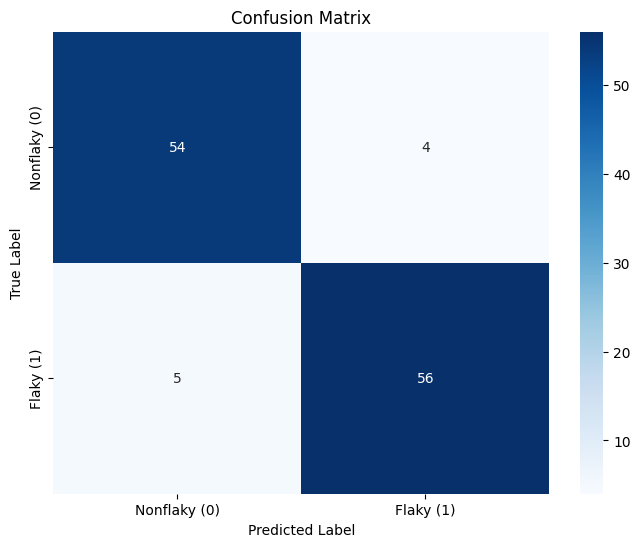

In [10]:
data = pd.read_csv('processed_data.csv').sample(frac=1)

# Split the data into features and target
X = data.drop(columns=['klass'])  # Replace 'klass' with your actual target column name
y = data['klass']  # Target column

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Reduced complexity
    tf.keras.layers.Dropout(0.5),  # Increased dropout
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Training the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])



# Evaluating the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred, average='macro')



print("===================================================\n"*5)
print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')
print(f'Macro F1 Score: {f1}')




cm = confusion_matrix(y_test, y_pred)

# Labels for the classes
classes = ['Nonflaky (0)', 'Flaky (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

